In [1]:
import scanpy as sc
import squidpy as sq
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap


/home/haojiawu/anaconda3/lib/python3.11/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/home/haojiawu/anaconda3/lib/python3.11/site-packages/spatialdata/__init__.py:9: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  _check_geopandas_using_shapely()


In [2]:
human_visium = sq.read.visium("human_visium/")

/home/haojiawu/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/haojiawu/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
sc.pp.normalize_total(human_visium, target_sum=1e4)


In [4]:
sc.pp.log1p(human_visium)


In [5]:
sc.pp.highly_variable_genes(human_visium, min_mean=0.0125, max_mean=3, min_disp=0.5)


In [6]:
sc.pp.scale(human_visium, max_value=10)


In [7]:
sc.tl.pca(human_visium, svd_solver='arpack')


In [8]:
human_visium.obsm["spatial"] = human_visium.obsm["spatial"].astype(np.float)

/tmp/ipykernel_301314/1194201790.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  human_visium.obsm["spatial"] = human_visium.obsm["spatial"].astype(np.float)


In [9]:
human_visium.obs.array_row = human_visium.obs.array_row.astype(np.float)
human_visium.obs.array_col = human_visium.obs.array_col.astype(np.float)

/tmp/ipykernel_301314/68737204.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  human_visium.obs.array_row = human_visium.obs.array_row.astype(np.float)
/tmp/ipykernel_301314/68737204.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  human_visium.obs.array_col = human_visium.obs.array_col.astype(np.float)


In [10]:
colors = ["lightyellow", "greenyellow", "darkgreen"]
colormap = LinearSegmentedColormap.from_list("my_colormap", colors)


In [11]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]

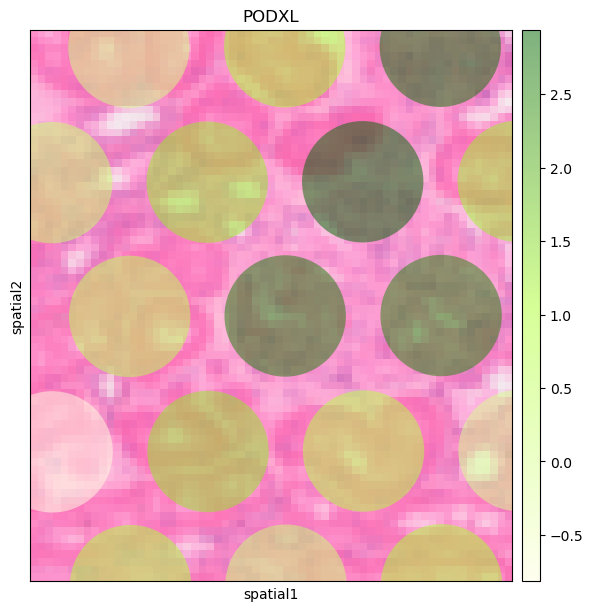

In [12]:

sq.pl.spatial_scatter(human_visium, color=["PODXL"], alpha=0.5,size=1.3,
                     crop_coord=[(9300,18700,10440, 20000)], cmap=colormap)

In [13]:
human_visium.write("human_visium.h5ad")